(u'waist_circumference', [62, 219, 253, 280, 281, 282, 565, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900])
(u'upper_pressure', [699, 700, 775, 776, 779, 790, 804, 810, 814, 816, 817, 822, 823, 826, 827, 829, 831, 832, 833, 835, 838, 842, 843, 846, 851, 855, 863, 864, 865, 867])
(u'lower_pressure', [699, 700, 775, 776, 7

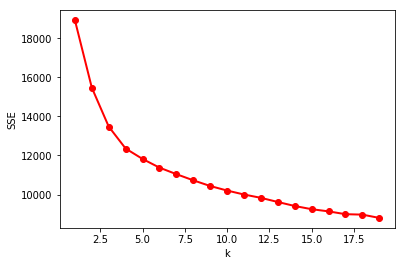

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = pd.read_excel('split_database_901_only_metabolic.xlsx')

#数据全部转换为float64
data = data.astype('float64')

#定位缺失值
for columname in data.columns:
    if data[columname].count() != len(data):
        loc = data[columname][data[columname].isnull().values==True].index.tolist()
        print(columname, loc)

#以平均值替换缺失值
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
imp.fit(data)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
data_imputed = imp.transform(data)

#标准化数据进行后续操作
data_imputed = pd.DataFrame(preprocessing.scale(data_imputed), columns=data.columns)

#进行KMean
from sklearn import cluster, metrics

#手肘法确定K值
from scipy.spatial.distance import cdist

elbows = []
ks = range(1,20)
for k in ks:
	kmeans_fit = cluster.KMeans(n_clusters = k).fit(data_imputed)
	elbow = sum(np.min(cdist(data_imputed, kmeans_fit.cluster_centers_, 'euclidean'), axis=1) ** 2) 
	elbows.append(elbow)

print(elbows)
plt.xlabel('k')
plt.ylabel('SSE')
'''
plt.xticks(np.linspace(1,19,19))
plt.ylim(2500,13500)
'''
plt.plot(ks, elbows, color = 'red',  marker='o', linewidth = 2.0)
'''
plt.annotate('', xy=(4.3, 6400), xytext = (5.5,7500), arrowprops=dict(width=1.5, headwidth=9, headlength=9, facecolor='black'))
'''
plt.savefig("metabolic_kmeans_elbow.png", dpi=300)